In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

state2ID= {}
ID2state= {}
dailyHistory= []
with open('us-states_rolling.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    # Iterate through each row
    i= 0
    flowDate= "2020-01-21"
    cacheOneDay= {}
    for row in csv_reader:
        i+= 1
        if i>1:
            date= row[0]
            state= row[2]
            case= float(row[4])
            death= float(row[7])
            if flowDate!= date:
                flowDate= date
                dailyHistory.append(cacheOneDay)
                cacheOneDay= {}
                
            if state2ID.get(state)== None:
                state2ID[state]= len(state2ID.keys())
                ID2state[state2ID[state]]= state
            stateId= state2ID.get(state)
            cacheOneDay[stateId]= (case, death)
# all 50 states, the District of Columbia, and 5 US territories.

In [5]:
statesNum= len(state2ID.keys())
print(statesNum)
timeHorizon= len(dailyHistory)
print(state2ID.keys())

56
dict_keys(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts', 'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Rhode Island', 'New York', 'Florida', 'New Hampshire', 'RGGrgia', 'North Carolina', 'New Jersey', 'Tennessee', 'Nevada', 'Maryland', 'Colorado', 'South Carolina', 'Pennsylvania', 'Oklahoma', 'Minnesota', 'Kentucky', 'Indiana', 'Hawaii', 'Virginia', 'Vermont', 'Missouri', 'Kansas', 'District of Columbia', 'Iowa', 'Connecticut', 'Ohio', 'Louisiana', 'South Dakota', 'Michigan', 'Wyoming', 'North Dakota', 'New Mexico', 'Mississippi', 'Delaware', 'Arkansas', 'Maine', 'Alaska', 'Puerto Rico', 'Montana', 'Idaho', 'Alabama', 'Virgin Islands', 'Guam', 'West Virginia', 'Northern Mariana Islands', 'American Samoa'])


In [6]:
statesTemperalI= np.zeros((statesNum, timeHorizon), dtype= np.float32)
countryTemperalI= np.zeros((timeHorizon), dtype= np.float32)
statesTemperalD= np.zeros((statesNum, timeHorizon), dtype= np.float32)
countryTemperalD= np.zeros((timeHorizon), dtype= np.float32)
for i, dayData in  enumerate(dailyHistory):
    sumI= 0
    sumD= 0
    for key in dayData:
        statesTemperalI[key, i]= dayData[key][0]
        statesTemperalD[key, i]= dayData[key][1]
        sumI+= statesTemperalI[key, i]
        sumD+= statesTemperalD[key, i]
        if statesTemperalI[key, i]<0:
            print(dayData[key][0])
            print(i)
            print()
    lastDayData= dayData.copy()
    countryTemperalI[i]= sumI
    countryTemperalD[i]= sumD

In [11]:
800000/330000000

0.0024242424242424242

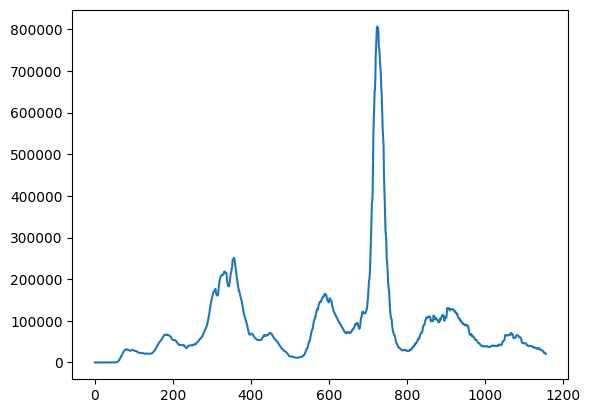

In [7]:
plt.plot(countryTemperalI)# 100, 000, 000;6/3

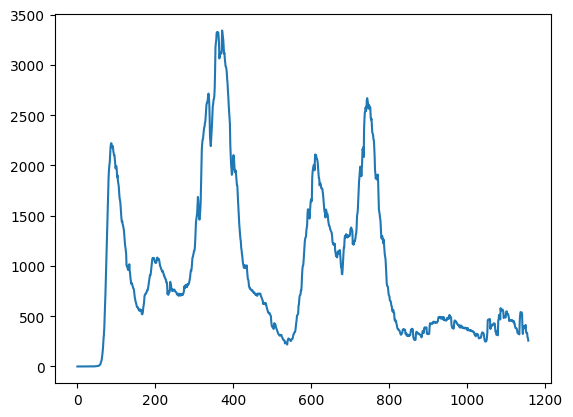

In [8]:
plt.plot(countryTemperalD)# 100, 000, 000

In [9]:
statesNum= 10
fig, axs = plt.subplots(statesNum, sharex=True, figsize=(12, 10))
fig.supylabel('AccuI')
fig.supxlabel('Time')
for i, ax in enumerate(axs):
  ax.plot(statesTemperalI[i, :], color="blue")
  ax.yaxis.set_visible(False)
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)    
  ax.spines["left"].set_visible(False)    
  ax.spines["bottom"].set_visible(False)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
